In [9]:
import pandas as pd



# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [10]:
print(df.columns)


Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


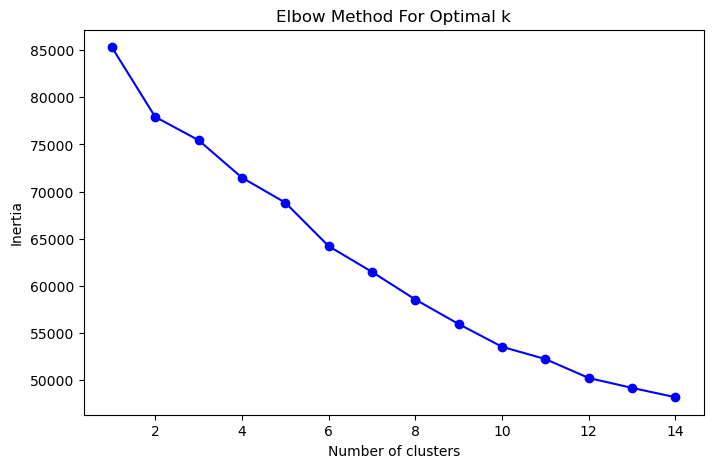

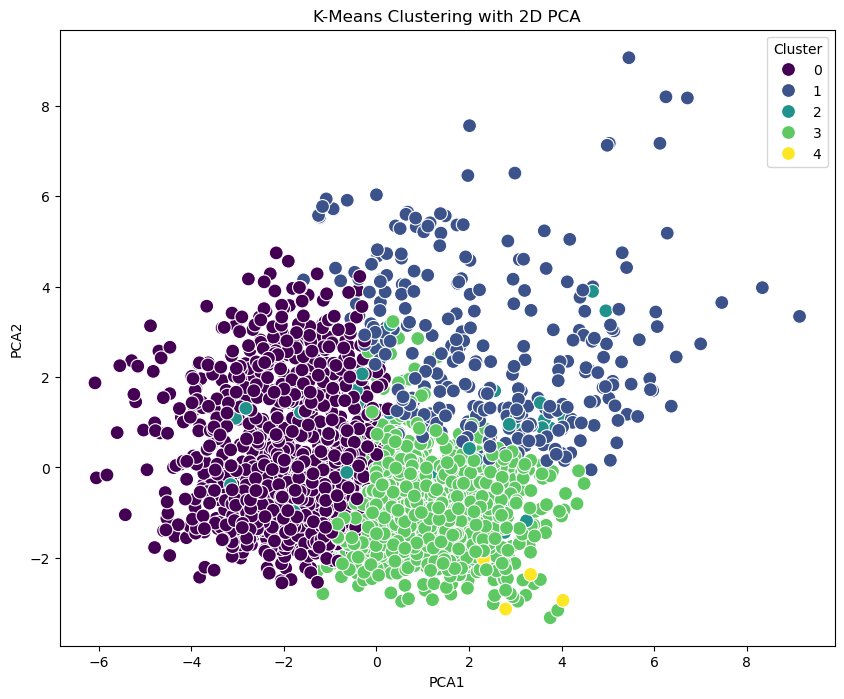

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns that are not useful for clustering
df_numeric = df.drop(columns=['Title'])

# Normalize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the Elbow Method, choose an optimal k (e.g., k=5)
optimal_k = 5

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters (for example, using the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], data=df, palette='viridis', s=100)
plt.title('K-Means Clustering with Reduced Dimensionality')
plt.show()



In [12]:
cluster_names = {
    0: 'Mainstream Genre Hits',
    1: 'Acclaimed Crowd-Pleasers',
    2: 'Modern Westerns/Crime',
    3: 'Cult/Arthouse Gems',
    4: 'Issue-Driven Docs'
}

df['Cluster Name'] = df['Cluster'].map(cluster_names)

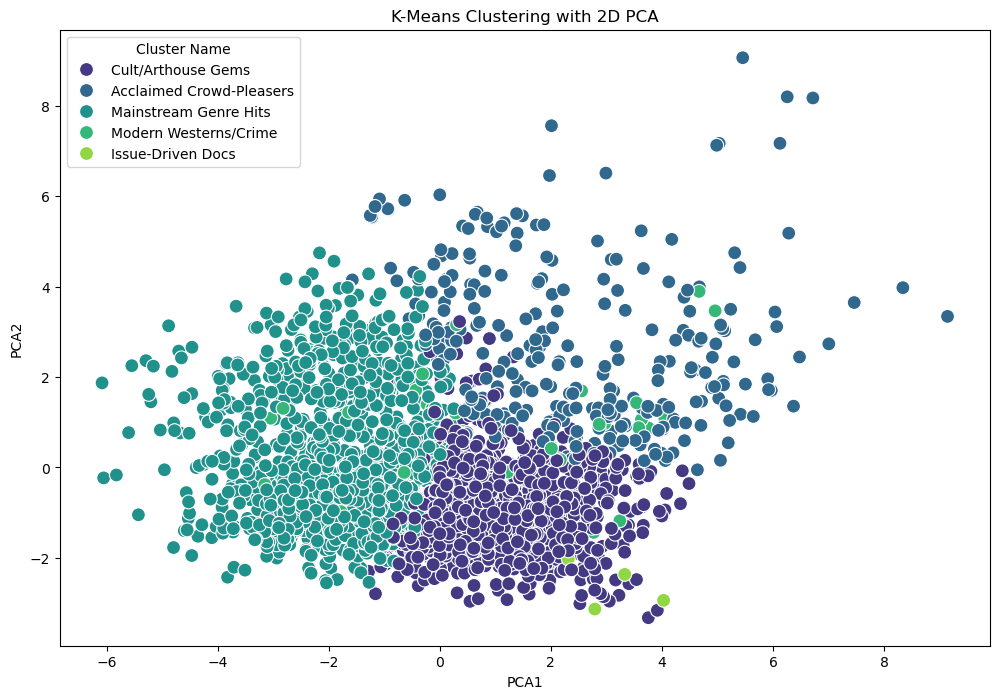

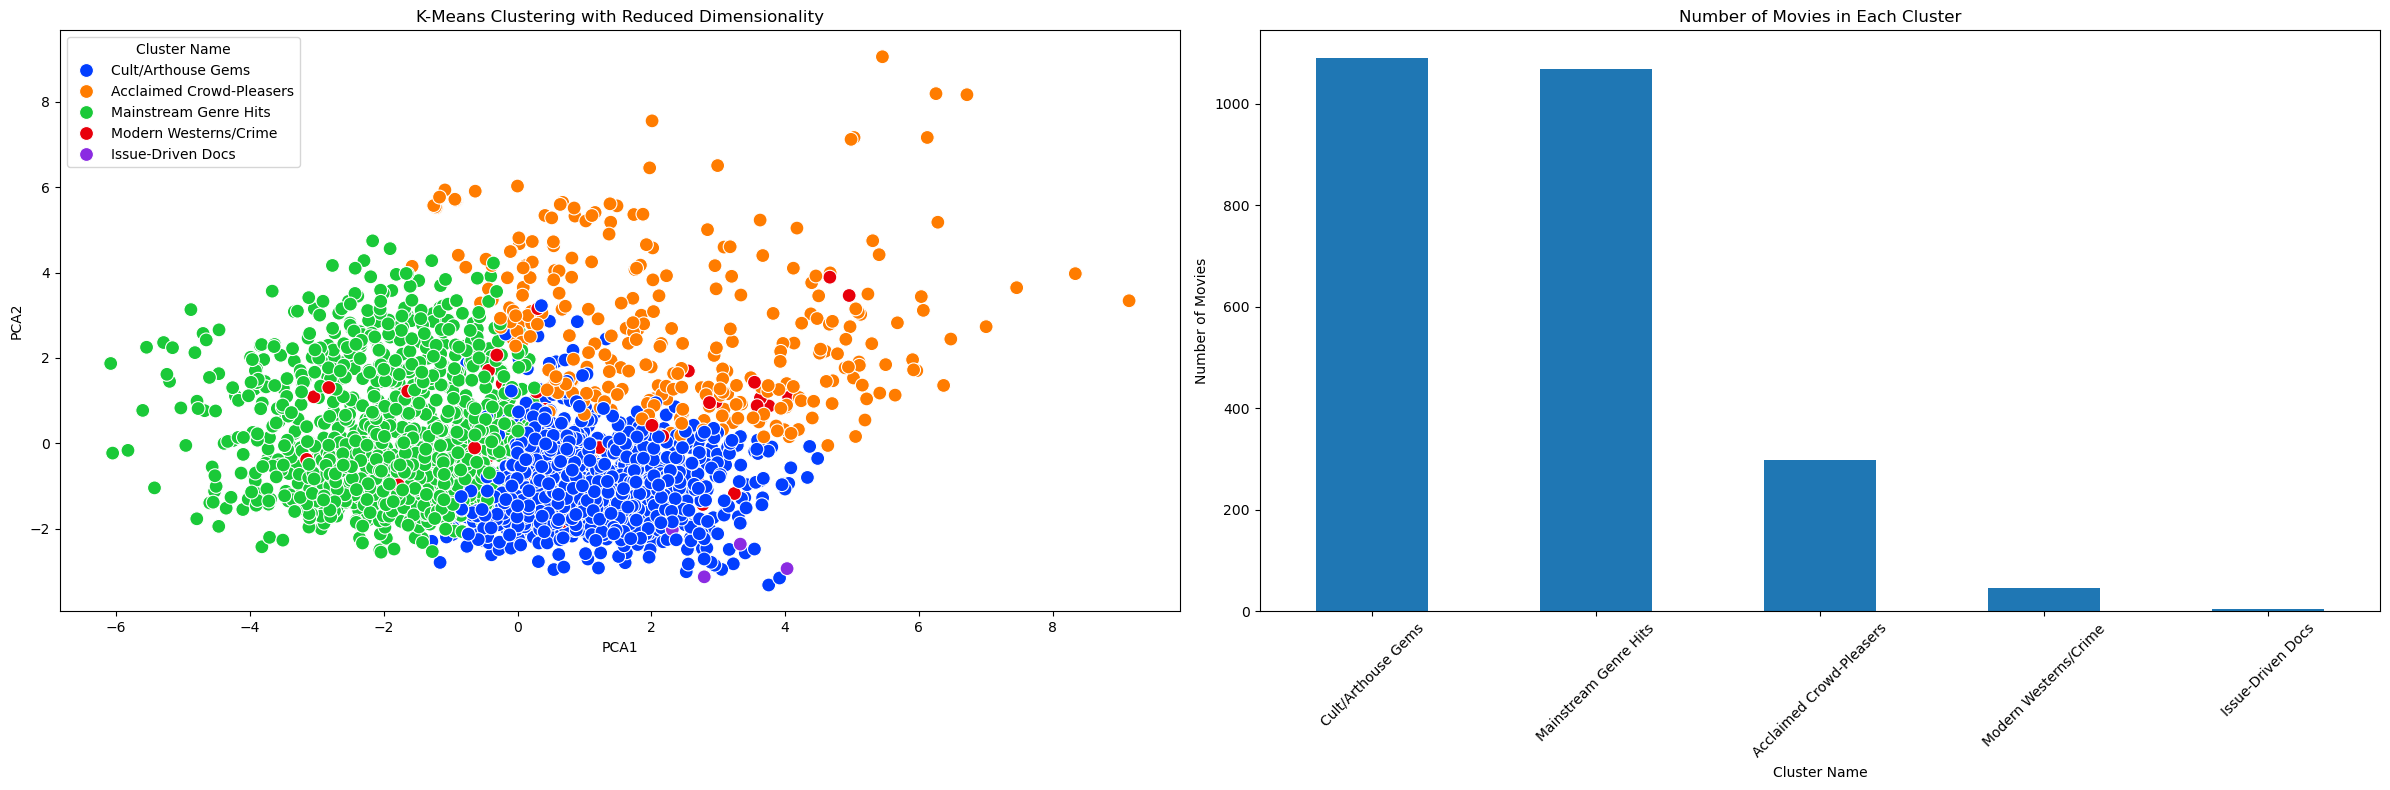

In [25]:
import matplotlib.pyplot as plt

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

sns.scatterplot(ax=axes[0], x='PCA1', y='PCA2', hue='Cluster Name', data=df, palette='bright', s=100)
axes[0].set_title('K-Means Clustering with Reduced Dimensionality')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')
axes[0].legend(title='Cluster Name')

cluster_counts = df['Cluster Name'].value_counts()
cluster_counts.plot(ax=axes[1], kind='bar')
axes[1].set_title('Number of Movies in Each Cluster')
axes[1].set_xlabel('Cluster Name')
axes[1].set_ylabel('Number of Movies')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

I came up with cluster names by providing deepseek with the cluster_analysis and then using a iterativ process I reprompted deepseek with the clusters and a random movie selection

Issue Driven Docs and Modern Westerns/Crime does not provide new information since it just contains all Movies of Documentaries/News and Western respectivly

In [13]:


# Analyze the clusters
cluster_analysis = df.groupby('Cluster Name')[df_numeric.columns].mean()
cluster_analysis

,Is Series,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,IMDb Votes,Minimum Age,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
Cluster Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acclaimed Crowd-Pleasers,0.026756,3.971572,4.150502,7.728763,85.050167,76.187291,49.886288,90.411371,1.762395e+08,1.470801e+09,616194.260870,14.505017,0.418060,0.408027,0.030100,0.090301,0.110368,0.157191,0.000000,0.535117,0.060201,0.160535,0.040134,0.060201,0.016722,0.013378,0.177258,0.0,0.107023,0.347826,0.006689,0.311037,0.066890,0.0
Cult/Arthouse Gems,0.029358,4.330092,3.510092,7.129541,79.802752,69.190826,11.698165,21.792661,2.432258e+07,1.493230e+09,93756.849541,12.044037,0.107339,0.058716,0.031193,0.200000,0.259633,0.166055,0.067890,0.830275,0.045872,0.065138,0.102752,0.044954,0.066055,0.014679,0.080734,0.0,0.256881,0.033028,0.051376,0.213761,0.070642,0.0
Issue-Driven Docs,0.000000,5.400000,3.000000,7.575000,93.500000,77.750000,11.000000,24.000000,7.288442e+05,1.434629e+09,22434.000000,7.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Mainstream Genre Hits,0.010290,2.644528,3.263798,6.134238,45.176801,47.276894,3.378859,9.159027,7.189148e+07,1.465500e+09,129988.217025,13.577175,0.410664,0.315248,0.098223,0.011225,0.459308,0.187091,0.002806,0.279701,0.185220,0.231993,0.007484,0.166511,0.013096,0.030870,0.134705,0.0,0.181478,0.181478,0.025257,0.378859,0.015903,0.0
Modern Westerns/Crime,0.021277,3.965957,3.723404,7.114894,78.446809,69.297872,19.914894,50.148936,4.248967e+07,1.492941e+09,187938.489362,14.446809,0.446809,0.297872,0.042553,0.063830,0.191489,0.319149,0.000000,0.744681,0.063830,0.021277,0.063830,0.000000,0.000000,0.000000,0.042553,0.0,0.127660,0.063830,0.000000,0.297872,0.000000,1.0


In [14]:
print(df[['Title', 'Cluster Name']])

                                                  Title  \
0                                      Lets Fight Ghost   
1                                   HOW TO BUILD A GIRL   
2                                                 Joker   
3                                                     I   
4                                      Harrys Daughters   
5                                            The Closet   
6                                                 Alice   
7                                       Ordinary People   
8                                     Paths of the Soul   
9                                           Stand by Me   
10                                         Wonderstruck   
11                                The Girl on the Train   
12                                       Ride Your Wave   
13                                                  Red   
14                                               Burden   
15                                                 Love 

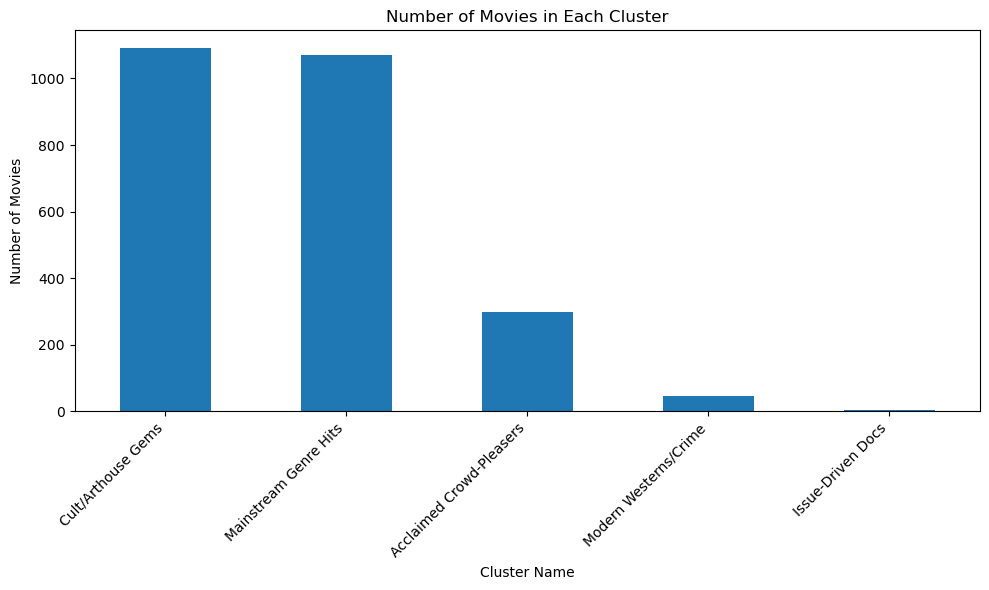

In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.groupby('Cluster Name').apply(lambda x: x.sample(min(len(x), 10)))[['Title']]

C:\Users\stefa\AppData\Local\Temp\ipykernel_28324\2396723821.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Cluster Name').apply(lambda x: x.sample(min(len(x), 10)))[['Title']]


Title
Cluster Name                                                            
Acclaimed Crowd-Pleasers 2458     Harry Potter and the Half-Blood Prince
                         1178               Kingsman: The Secret Service
                         1331                       Apocalypse Now Redux
                         2334                           The Hunger Games
                         1506                              The Conjuring
                         2009                                   Kick-Ass
                         951                                   Furious 7
                         4                              Harrys Daughters
                         1902                       Silence of the Lambs
                         1739                    Star Trek Into Darkness
Cult/Arthouse Gems       317                              First Reformed
                         736                  Asura: The City of Madness
                         2184                                  Airplane!
                         1455                             Eye in the Sky
                         887                                 In Darkness
                         255                  What to Do in Case of Fire
                         211                                    The Land
                         2127                                Primal Fear
                         633             Monty Python and the Holy Grail
                         1443                      Stranger than Fiction
Issue-Driven Docs        1629                              Red Obsession
                         2443                                 The Square
                         2419                                  Blackfish
                         1143                                Cartel Land
Mainstream Genre Hits    1965                                The Muppets
                         269                               A Girls Tears
                         2294                                    Killers
                         1735  The Phantom of the Opera: Special Edition
                         1105                         As Above, So Below
                         1580                              The Counselor
                         757                                       Burnt
                         877                                  King Cobra
                         2165                                Cloverfield
                         1841                 The Men Who Stare at Goats
Modern Westerns/Crime    609                               Sweet Country
                         122      High & Low The Movie 3 / Final Mission
                         1240                                 Unforgiven
                         124                     High & Low The Red Rain
                         288                   The Ballad of Lefty Brown
                         1209                              The Salvation
                         574                                  Wyatt Earp
                         496                          Dances with Wolves
                         1297                             Wild Wild West
                         29            Marlina the Murderer in Four Acts

In [17]:

df.sort_values(by='Cluster',ascending=True)[['Title', 'Cluster Name']]

,Title,Cluster Name
2499,Sex and the City 2,Mainstream Genre Hits
2466,Act of Valour,Mainstream Genre Hits
2465,Sex and the City: The Movie,Mainstream Genre Hits
2464,A Walk to Remember,Mainstream Genre Hits
1161,The Longest Ride,Mainstream Genre Hits
1159,Last Action Hero,Mainstream Genre Hits
22,Sonic the Hedgehog,Mainstream Genre Hits
2453,Pineapple Express,Mainstream Genre Hits
1154,Trash,Mainstream Genre Hits
1152,Big Game,Mainstream Genre Hits
